In [81]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
portfolio = ['ENBR3', 'TRPL4', 'BBAS3', 'SLCE3', 'SQIA3', 'MOVI3', 'LREN3', 'GOAU4']

portfolio_prep = sorted([stock + '.SA' for stock in portfolio])

stocks = ' '.join(portfolio_prep)

stocks # required format to be read by Yahoo Finance download method

'BBAS3.SA ENBR3.SA GOAU4.SA LREN3.SA MOVI3.SA SLCE3.SA SQIA3.SA TRPL4.SA'

In [120]:
portfolio_historic_info = yf.download(stocks, start='2020-01-01', end='2022-08-08')

portfolio_historic_info.head(10)

[*********************100%***********************]  8 of 8 completed


Adj Close                                                        \
             BBAS3.SA   ENBR3.SA  GOAU4.SA   LREN3.SA   MOVI3.SA   SLCE3.SA   
Date                                                                          
2020-01-02  45.825859  18.620781  7.263621  54.501568  17.875832  20.464672   
2020-01-03  45.749199  18.739763  7.278628  54.122429  18.350573  20.378059   
2020-01-06  45.144424  18.595285  7.241109  54.075035  18.418335  20.196955   
2020-01-07  44.803719  18.484800  7.293635  54.046604  18.381569  19.685143   
2020-01-08  44.394855  18.459305  7.248612  54.397308  18.473476  19.803253   
2020-01-09  43.491978  18.918238  7.256117  53.980247  18.730820  19.685143   
2020-01-10  42.469841  19.266685  7.413694  54.150864  18.684866  19.543409   
2020-01-13  42.946831  19.266685  7.803889  55.326199  18.887062  19.425301   
2020-01-14  42.716846  19.266685  7.616296  54.624790  18.978970  19.362309   
2020-01-15  41.933208  18.867245  7.631304  54.264610  18.951397  19.055218   

                                      Close             ...       Open  \
             SQIA3.SA   TRPL4.SA   BBAS3.SA   ENBR3.SA  ...   SQIA3.SA   
Date                                                    ...              
2020-01-02  24.482216  18.277992  53.799999  21.910000  ...  24.740000   
2020-01-03  24.362789  17.820440  53.709999  22.049999  ...  24.299999   
2020-01-06  24.880301  17.924795  53.000000  21.879999  ...  24.400000   
2020-01-07  24.979820  17.796362  52.599998  21.750000  ...  25.250000   
2020-01-08  24.969870  17.659897  52.119999  21.719999  ...  25.049999   
2020-01-09  24.123940  17.595682  51.060001  22.260000  ...  25.260000   
2020-01-10  24.034369  17.740171  49.860001  22.670000  ...  24.120001   
2020-01-13  24.382692  17.980988  50.419998  22.670000  ...  24.299999   
2020-01-14  24.880301  17.948881  50.150002  22.670000  ...  24.510000   
2020-01-15  26.462687  17.956905  49.230000  22.200001  ...  25.190001   

                         Volume                                                \
             TRPL4.SA  BBAS3.SA ENBR3.SA  GOAU4.SA LREN3.SA MOVI3.SA SLCE3.SA   
Date                                                                            
2020-01-02  22.600000  13159900  3070700  11988800  3015656  1902300  1190530   
2020-01-03  22.650000   9465400  4457000  15648300  4239538  2476000  1489510   
2020-01-06  22.270000   9999900  3548100  11752900  3793106  1693200   846010   
2020-01-07  22.400000  10638500  2655400  12266000  3460374  1525500  1149720   
2020-01-08  22.200001  21468600  3524400  10127800  4211718  1988200  1242010   
2020-01-09  22.010000  24743000  6710500   8588400  3774157  1997100   865480   
2020-01-10  22.010000  15348200  3723100   9389400  5085027  1085500  1146750   
2020-01-13  22.110001  14181900  2414700  11435000  3728798   980800  1100110   
2020-01-14  22.400000   8765000  5225100  10723900  5618043   878900  1234860   
2020-01-15  22.360001  14501900  2738700  12693400  4094995  1141600  1288760   

                              
           SQIA3.SA TRPL4.SA  
Date                          
2020-01-02  1340200  1381700  
2020-01-03  1019500  2420000  
2020-01-06   730600  1444300  
2020-01-07   997200  1579300  
2020-01-08   709300  1807700  
2020-01-09   716600  1963400  
2020-01-10   541500  1426700  
2020-01-13   542200  2674600  
2020-01-14   805800  1506200  
2020-01-15  1196100  1185000  

[10 rows x 48 columns]

In [121]:
adj_close = portfolio_historic_info['Adj Close']

holding_period_return = round(((adj_close.iloc[-1] - adj_close.iloc[0]) / adj_close.iloc[0]) * 100, 2)

holding_period_return

BBAS3.SA    -17.94
ENBR3.SA     18.95
GOAU4.SA     36.80
LREN3.SA    -49.60
MOVI3.SA    -24.31
SLCE3.SA    107.43
SQIA3.SA    -22.80
TRPL4.SA     30.43
dtype: float64

In [122]:
portfolio_corr_matrix = adj_close.corr(method='pearson')

portfolio_corr_matrix

,BBAS3.SA,ENBR3.SA,GOAU4.SA,LREN3.SA,MOVI3.SA,SLCE3.SA,SQIA3.SA,TRPL4.SA
BBAS3.SA,1.000000,0.628291,0.205681,0.276833,0.488821,0.082101,0.195316,0.190953
ENBR3.SA,0.628291,1.000000,0.640865,-0.478629,0.246949,0.681522,-0.327109,0.665782
GOAU4.SA,0.205681,0.640865,1.000000,-0.439517,0.524411,0.874743,-0.024447,0.920513
LREN3.SA,0.276833,-0.478629,-0.439517,1.000000,0.353169,-0.696996,0.730372,-0.514715
MOVI3.SA,0.488821,0.246949,0.524411,0.353169,1.000000,0.172729,0.631112,0.469042
SLCE3.SA,0.082101,0.681522,0.874743,-0.696996,0.172729,1.000000,-0.287923,0.845331
SQIA3.SA,0.195316,-0.327109,-0.024447,0.730372,0.631112,-0.287923,1.000000,-0.157807
TRPL4.SA,0.190953,0.665782,0.920513,-0.514715,0.469042,0.845331,-0.157807,1.000000


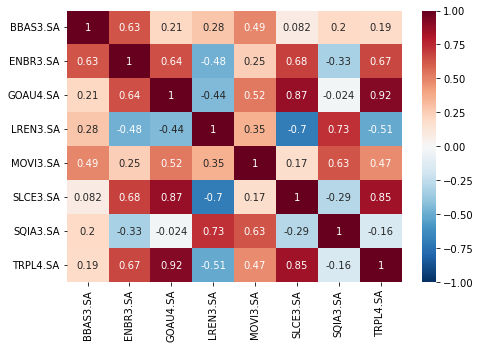

In [124]:
plt.figure(figsize=(7.5, 5))
sns.heatmap(portfolio_corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, center=0)
plt.xlabel('')
plt.ylabel('');